In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from keras.layers import Input, Conv1D, Conv2D, Conv2DTranspose
from keras.models import Model
from sklearn.metrics import mean_squared_error
from keras import optimizers
from sklearn.preprocessing import normalize
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
####################################
# train 데이터 load
####################################
# train set load
train_dataset = pd.read_csv('C:/Users/ARA/Desktop/금형/python/data/train_failure30_4.csv', header=0)
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,label
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,0
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,0
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,0
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,0
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,0


In [3]:
# unique columns 추출
uniq_col = []
for i in range(train_dataset.shape[1]):
    if len(np.unique(train_dataset.iloc[:,i], axis=0)) != 1: uniq_col.append(i)
uniq_col.remove(0)
uniq_col.remove(1)
uniq_col.remove(26)
len(uniq_col)

24

In [4]:
train_dataset = train_dataset.T.reset_index(drop=True).T
train_dataset.rename(columns={0:'id', 1:'cycle', 26:'label'}, inplace=True)

In [5]:
"""
# NASA_Preparation에서 패딩 사용 안했을 때

# 150보다 작은 정상 데이터만 학습용으로 추출
train_dataset2 = train_dataset[train_dataset['cycle']< 150]
train_dataset3 = train_dataset2[train_dataset2['label']!=1]
train_dataset3 = train_dataset3[train_dataset3['label']!=2]
train_uniq = np.asarray(train_dataset3[uniq_col])

# scaling
sc = StandardScaler()
train_uniq = sc.fit_transform(train_uniq)


X_train = np.reshape(train_uniq, (train_uniq.shape[0], train_uniq.shape[1], 1, 1))
X_train.shape
"""

"\n# NASA_Preparation에서 패딩 사용 안했을 때\n\n# 150보다 작은 정상 데이터만 학습용으로 추출\ntrain_dataset2 = train_dataset[train_dataset['cycle']< 150]\ntrain_dataset3 = train_dataset2[train_dataset2['label']!=1]\ntrain_dataset3 = train_dataset3[train_dataset3['label']!=2]\ntrain_uniq = np.asarray(train_dataset3[uniq_col])\n\n# scaling\nsc = StandardScaler()\ntrain_uniq = sc.fit_transform(train_uniq)\n\n\nX_train = np.reshape(train_uniq, (train_uniq.shape[0], train_uniq.shape[1], 1, 1))\nX_train.shape\n"

In [6]:

# NASA_Preparation 에서 정상만 훈련시키고 싶을때 (또는 이미 패딩 사용했을 시), 이 부분 적용

# 정상 데이터만 학습
train_seq_T = train_dataset[train_dataset['label']==0]
print("정상 데이터 shape: ", train_seq_T.shape)

# scaling
sc = StandardScaler()

X_train = np.asarray(train_seq_T[uniq_col])
X_train = sc.fit_transform(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))

print("훈련에 사용할 데이터 shape: ", X_train.shape)


정상 데이터 shape:  (42688, 27)
훈련에 사용할 데이터 shape:  (42688, 24, 1, 1)


In [7]:
"""
####################################
# Model
####################################
input_data = Input(shape=X_train.shape[1:])

x = Conv1D(8, activation='relu', kernel_size=3, padding='same')(input_data)
x = Conv1D(8, activation='relu', kernel_size=3, padding='same')(x)
encoded = Conv1D(2, activation='relu', kernel_size=3, padding='same')(x)

x = Conv1D(4, activation='relu', kernel_size=3, padding='same')(encoded)
x = Conv1D(8, activation='relu', kernel_size=3, padding='same')(x)
x = Conv1D(8, activation='relu', kernel_size=3, padding='same')(x)
decoded = Conv1D(1, activation='sigmoid', kernel_size=3, padding='same')(x)

autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)

autoencoder.compile(loss='mse', optimizer='adadelta', metrics=['acc'])
encoder.compile(loss='mse', optimizer='adadelta', metrics=['acc'])

autoencoder.summary()
"""

"\n####################################\n# Model\n####################################\ninput_data = Input(shape=X_train.shape[1:])\n\nx = Conv1D(8, activation='relu', kernel_size=3, padding='same')(input_data)\nx = Conv1D(8, activation='relu', kernel_size=3, padding='same')(x)\nencoded = Conv1D(2, activation='relu', kernel_size=3, padding='same')(x)\n\nx = Conv1D(4, activation='relu', kernel_size=3, padding='same')(encoded)\nx = Conv1D(8, activation='relu', kernel_size=3, padding='same')(x)\nx = Conv1D(8, activation='relu', kernel_size=3, padding='same')(x)\ndecoded = Conv1D(1, activation='sigmoid', kernel_size=3, padding='same')(x)\n\nautoencoder = Model(input_data, decoded)\nencoder = Model(input_data, encoded)\n\nautoencoder.compile(loss='mse', optimizer='adadelta', metrics=['acc'])\nencoder.compile(loss='mse', optimizer='adadelta', metrics=['acc'])\n\nautoencoder.summary()\n"

In [8]:
#######################################
# CNN1D AutoEncoder 구축
#######################################

input_data = Input(shape=X_train.shape[1:]) # 1ch=black&white

#@@ C-AE 구현http://localhost:8888/notebooks/Desktop/%EA%B8%88%ED%98%95/python/AutoEncoder/CNN1DAE.ipynb#
filter1 = 4
filter2 = 4
filter3 = 8
kernel_size1 = 5
kernel_size2 = 5

x = Conv2D(filter1, kernel_size= (kernel_size1,1), activation='relu')(input_data)
x = Conv2D(filter2, kernel_size= (kernel_size1,1), activation='relu')(x)
x = Conv2D(filter3, kernel_size= (kernel_size1,1), activation='relu')(x)
encoded = Conv2D(16, kernel_size= (kernel_size2,1), activation='sigmoid')(x)

x = Conv2DTranspose(filter3, kernel_size= (kernel_size2,1), activation='relu')(encoded)
x = Conv2DTranspose(filter2, kernel_size= (kernel_size1,1), activation='relu')(x)
x = Conv2DTranspose(filter1, kernel_size= (kernel_size1,1), activation='relu')(x)
decoded = Conv2DTranspose(X_train.shape[-1], kernel_size=(kernel_size1,1), activation='sigmoid')(x)

adam = optimizers.Adam(lr=0.01)
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer=adam, loss='mse')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24, 1, 1)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 1, 4)          24        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 1, 4)          84        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 1, 8)          168       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 1, 16)          656       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 12, 1, 8)          648       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 1, 4)          164       
__________

In [9]:
early_stopping = EarlyStopping(patience=3, mode='min')
autoencoder.fit(X_train, X_train, epochs= 100, batch_size=1024, shuffle=True, verbose=1, validation_split=0.05, callbacks=[early_stopping]) 

Train on 40553 samples, validate on 2135 samples
Epoch 1/100
40553/40553 [==============================] - 2s 48us/step - loss: 1.0372 - val_loss: 0.9432
Epoch 2/100
40553/40553 [==============================] - 1s 34us/step - loss: 0.8240 - val_loss: 0.7741
Epoch 3/100
40553/40553 [==============================] - 1s 33us/step - loss: 0.7085 - val_loss: 0.6909
Epoch 4/100
40553/40553 [==============================] - 1s 33us/step - loss: 0.6846 - val_loss: 0.6806
Epoch 5/100
40553/40553 [==============================] - 1s 34us/step - loss: 0.6778 - val_loss: 0.6750
Epoch 6/100
40553/40553 [==============================] - 1s 34us/step - loss: 0.6665 - val_loss: 0.6623
Epoch 7/100
40553/40553 [==============================] - 1s 33us/step - loss: 0.6601 - val_loss: 0.6588
Epoch 8/100
40553/40553 [==============================] - 1s 34us/step - loss: 0.6578 - val_loss: 0.6573
Epoch 9/100
40553/40553 [==============================] - 1s 34us/step - loss: 0.6567 - val_loss: 0.65

In [10]:
# all_data: 정상 + 이상인 전체 훈련 데이터 셋
all_data = np.asarray(train_dataset[uniq_col])

# scaling
all_data = sc.transform(all_data)
print(all_data.shape)
all_data = np.reshape(all_data, (all_data.shape[0], all_data.shape[1], 1, 1))
print(all_data.shape)

(48658, 24)
(48658, 24, 1, 1)


In [11]:
"""
### 인코더에서 특성 추출 for 2D plotting
encoder = Model(input_data, encoded)
encoder.compile(optimizer='adam', loss='mse')

enco_train_pred = encoder.predict(all_data)
print("enco_train_pred.shape: ", enco_train_pred.shape)

enco_train_re = np.reshape(enco_train_pred,(len(enco_train_pred),2))
print("enco_train_re.shape: ", enco_train_re.shape)

label = np.asarray(train_dataset['label'])
label = label.reshape((len(label),1))
print("label.shape: ",label.shape)
print("np.sum(label): ", np.sum(label))

X_reduce = pd.DataFrame()
X_reduce['x'] = [enco_train_re[x][0] for x in range(0,len(enco_train_re))]
X_reduce['y'] = [enco_train_re[x][1] for x in range(0,len(enco_train_re))]
X_reduce['label'] = label

b1 = plt.scatter(X_reduce['x'][X_reduce.label == 1], X_reduce['y'][X_reduce.label == 1], c= 'red', s= 20, alpha= 0.5)
b1 = plt.scatter(X_reduce['x'][X_reduce.label == 0], X_reduce['y'][X_reduce.label == 0], c= 'yellow', s= 20, alpha= 0.05)

plt.show()
"""

'\n### 인코더에서 특성 추출 for 2D plotting\nencoder = Model(input_data, encoded)\nencoder.compile(optimizer=\'adam\', loss=\'mse\')\n\nenco_train_pred = encoder.predict(all_data)\nprint("enco_train_pred.shape: ", enco_train_pred.shape)\n\nenco_train_re = np.reshape(enco_train_pred,(len(enco_train_pred),2))\nprint("enco_train_re.shape: ", enco_train_re.shape)\n\nlabel = np.asarray(train_dataset[\'label\'])\nlabel = label.reshape((len(label),1))\nprint("label.shape: ",label.shape)\nprint("np.sum(label): ", np.sum(label))\n\nX_reduce = pd.DataFrame()\nX_reduce[\'x\'] = [enco_train_re[x][0] for x in range(0,len(enco_train_re))]\nX_reduce[\'y\'] = [enco_train_re[x][1] for x in range(0,len(enco_train_re))]\nX_reduce[\'label\'] = label\n\nb1 = plt.scatter(X_reduce[\'x\'][X_reduce.label == 1], X_reduce[\'y\'][X_reduce.label == 1], c= \'red\', s= 20, alpha= 0.5)\nb1 = plt.scatter(X_reduce[\'x\'][X_reduce.label == 0], X_reduce[\'y\'][X_reduce.label == 0], c= \'yellow\', s= 20, alpha= 0.05)\n\nplt.show()

In [12]:
##############################################
### CNN_AE predict - train data로 다시
##############################################
cnn1d_predict = autoencoder.predict(all_data)
cnn1d_predict.shape

(48658, 24, 1, 1)

In [13]:
# MSE 계산을 위한 flattening
cnn1d_predict = cnn1d_predict.reshape(cnn1d_predict.shape[0], cnn1d_predict.shape[1]* cnn1d_predict.shape[2])
cnn1d_predict.shape

(48658, 24)

In [14]:
all_data = all_data.reshape(all_data.shape[0], all_data.shape[1]* all_data.shape[2])
all_data.shape

(48658, 24)

In [15]:
### calculate MSE
mse = mean_squared_error(all_data.T, cnn1d_predict.T, multioutput='raw_values')
print("mse.shape: ", mse.shape)

print("최소값: ", np.min(mse), "\n중간값: ",np.mean(mse), "\n최대값: ", np.max(mse))

mse.shape:  (48658,)
최소값:  0.14485920646234732 
중간값:  0.6466793030166308 
최대값:  2.3970526747360297


In [35]:
### labeling
# mse < border
border = 2.22
label= [0 if  mse[x] < border else 1 for x in range(0,len(mse)) ]    # 정상 0, 이상 2
X_reduce = pd.DataFrame()
X_reduce['label'] = label
idx_0 = X_reduce[X_reduce.label == 0].index
idx_2 = X_reduce[X_reduce.label == 1].index
print("예측 정상 데이터 수: ",len(idx_0))
print("예측 고장 데이터 수: ",len(idx_2))

label = np.asarray(train_dataset['label'])
label = label.reshape((len(label),1))
print("전체 데이터 수: ",label.shape)
print("실제 고장 데이터 수: ", len(label[label==1]))

예측 정상 데이터 수:  42642
예측 고장 데이터 수:  6016
전체 데이터 수:  (48658, 1)
실제 고장 데이터 수:  5970


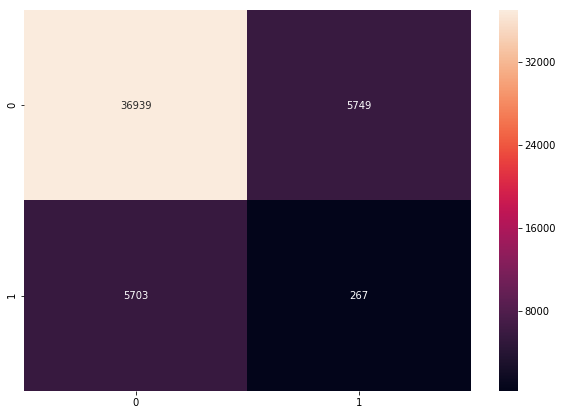

In [36]:
### plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

df_cm = pd.DataFrame(confusion_matrix(label, X_reduce['label']))
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

In [37]:
(df_cm.iloc[0,0]+df_cm.iloc[1,1])/(np.sum(df_cm)[0]+np.sum(df_cm)[1])

0.7646430186197543

In [38]:
from sklearn.metrics import classification_report

print(classification_report(label, X_reduce['label']))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     42688
         1.0       0.04      0.04      0.04      5970

   micro avg       0.76      0.76      0.76     48658
   macro avg       0.46      0.46      0.46     48658
weighted avg       0.77      0.76      0.77     48658



In [20]:
##############################################
### CNN_AE predict - test data
##############################################
# test set load
test_dataset = pd.read_csv('C:/Users/ARA/Desktop/금형/python/data/test_failure30_4.csv', header=0)
test_dataset = test_dataset.T.reset_index(drop=True).T
test_dataset.rename(columns={0:'id', 1:'cycle', 26:'label'}, inplace=True)

# scaling
test_dataset[uniq_col] = sc.transform(test_dataset[uniq_col])

all_test_data = np.asarray(test_dataset[uniq_col])
print(all_test_data.shape)
all_test_data = np.reshape(all_test_data, (all_test_data.shape[0], all_data.shape[1], 1, 1))
print(all_test_data.shape)

cnn1d_test_predict = autoencoder.predict(all_test_data)

# MSE 계산을 위한 flattening
cnn1d_test_predict = cnn1d_test_predict.reshape(cnn1d_test_predict.shape[0], cnn1d_test_predict.shape[1]* cnn1d_test_predict.shape[2])
print("cnn1d_test_predict.shape: ", cnn1d_test_predict.shape)

(12591, 24)
(12591, 24, 1, 1)
cnn1d_test_predict.shape:  (12591, 24)


In [21]:
all_test_data = all_test_data.reshape(all_test_data.shape[0], all_test_data.shape[1]* all_test_data.shape[2])
print("all_test_data.shape: ", all_test_data.shape)

all_test_data.shape:  (12591, 24)


In [22]:
### calculate MSE
mse_test = mean_squared_error(all_test_data.T, cnn1d_test_predict.T, multioutput='raw_values')
print("mse_test.shape: ", mse_test.shape)

print("최소값: ", np.min(mse_test), "중간값: ",np.mean(mse_test), "최대값: ", np.max(mse_test))

mse_test.shape:  (12591,)
최소값:  0.14551294102954207 중간값:  0.655600989782618 최대값:  2.3741159594721606


In [39]:
### labeling
# mse < border
border = 2.22
label= [0 if  mse_test[x] < border else 1 for x in range(0,len(mse_test)) ]    # 정상 0, 이상 2
X_reduce_test = pd.DataFrame()
X_reduce_test['label'] = label
idx_0 = X_reduce_test[X_reduce_test.label == 0].index
idx_2 = X_reduce_test[X_reduce_test.label == 1].index
print("예측 정상 데이터 수: ",len(idx_0))
print("예측 고장 데이터 수: ",len(idx_2))

test_label = np.asarray(test_dataset['label'])
label = test_label.reshape((len(test_label),1))
print("\n전체 데이터 수: ",label.shape[0])
print("실제 고장 데이터 수: ", len(label[label==1]))

예측 정상 데이터 수:  10980
예측 고장 데이터 수:  1611

전체 데이터 수:  12591
실제 고장 데이터 수:  1500


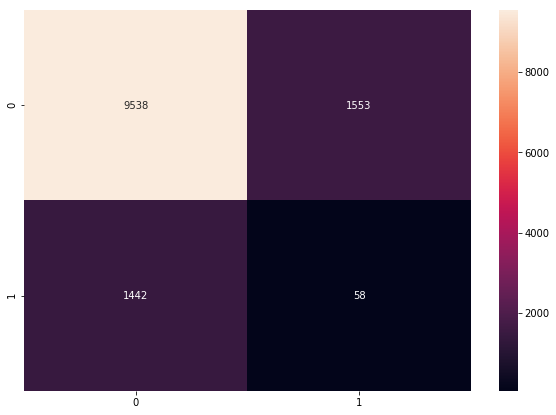

In [40]:
### plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

df_cm = pd.DataFrame(confusion_matrix(test_label, X_reduce_test['label']))
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

In [41]:
(df_cm.iloc[0,0]+df_cm.iloc[1,1])/(np.sum(df_cm)[0]+np.sum(df_cm)[1])

0.7621316813597013

In [42]:
print(classification_report(test_label, X_reduce_test['label']))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     11091
         1.0       0.04      0.04      0.04      1500

   micro avg       0.76      0.76      0.76     12591
   macro avg       0.45      0.45      0.45     12591
weighted avg       0.77      0.76      0.77     12591

